In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
carseats = pd.read_csv("Carseats.csv", index_col = ["Unnamed: 0"])

In [3]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


There are 11 columns in this dataset. The ShelveLoc, Urban and US predictors have text values, while the others have numerical value.

In [4]:
carseats.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


There are 400 datapoints and 11 features in the dataset. There are no missing values.

In [5]:
carseats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 37.5+ KB


The dataset has 400 not null values and 11 features. The ShelveLoc, Urban and US are categorical values. Others are numerical values are either int or float.

In [6]:
carseats.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

*Handling Categorical Variables:-*

In [7]:
carseats['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [8]:
carseats['ShelveLoc']= pd.Categorical(carseats['ShelveLoc'],['Medium','Bad','Good'])
carseats['ShelveLoc']= carseats['ShelveLoc'].cat.codes
print(carseats)

     Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
1     9.50        138      73           11         276    120          1   42   
2    11.22        111      48           16         260     83          2   65   
3    10.06        113      35           10         269     80          0   59   
4     7.40        117     100            4         466     97          0   55   
5     4.15        141      64            3         340    128          1   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
396  12.57        138     108           17         203    128          2   33   
397   6.14        139      23            3          37    120          0   55   
398   7.41        162      26           12         368    159          0   40   
399   5.94        100      79            7         284     95          1   50   
400   9.71        134      37            0          27    120          2   49   

     Education Urban   US  

In [9]:
carseats['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [10]:
carseats['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [11]:
carseats['US']= pd.Categorical(carseats['US'],['Yes','No'])
carseats['US']= carseats['US'].cat.codes
carseats['Urban']= pd.Categorical(carseats['Urban'],['Yes','No'])
carseats['Urban']= carseats['Urban'].cat.codes
print(carseats)

     Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
1     9.50        138      73           11         276    120          1   42   
2    11.22        111      48           16         260     83          2   65   
3    10.06        113      35           10         269     80          0   59   
4     7.40        117     100            4         466     97          0   55   
5     4.15        141      64            3         340    128          1   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
396  12.57        138     108           17         203    128          2   33   
397   6.14        139      23            3          37    120          0   55   
398   7.41        162      26           12         368    159          0   40   
399   5.94        100      79            7         284     95          1   50   
400   9.71        134      37            0          27    120          2   49   

     Education  Urban  US  

In [12]:
carseats_y = carseats["Sales"]

In [13]:
carseats_y

1       9.50
2      11.22
3      10.06
4       7.40
5       4.15
       ...  
396    12.57
397     6.14
398     7.41
399     5.94
400     9.71
Name: Sales, Length: 400, dtype: float64

In [14]:
carseats = carseats.drop(["Sales"], axis = 1)

In [15]:
carseats

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,138,73,11,276,120,1,42,17,0,0
2,111,48,16,260,83,2,65,10,0,0
3,113,35,10,269,80,0,59,12,0,0
4,117,100,4,466,97,0,55,14,0,0
5,141,64,3,340,128,1,38,13,0,1
...,...,...,...,...,...,...,...,...,...,...
396,138,108,17,203,128,2,33,14,0,0
397,139,23,3,37,120,0,55,11,1,0
398,162,26,12,368,159,0,40,18,0,0
399,100,79,7,284,95,1,50,12,0,0


**(a)**

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_val, y_train, y_val = train_test_split(carseats, carseats_y, test_size=0.2, random_state=1)

In [18]:
X_train.shape

(320, 10)

In [19]:
X_val.shape

(80, 10)

**(b)**

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [21]:
regressor = DecisionTreeRegressor(max_depth=2, random_state=0)
regressor.fit(X_train,y_train)
# cross_val_score(regressor, X_train, y_train, cv=10)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [22]:
pred = regressor.predict(X_val)

In [23]:
print("MSE:", mean_squared_error(y_val,pred))

MSE: 5.851132750038923


Text(0, 0.5, 'y_val')

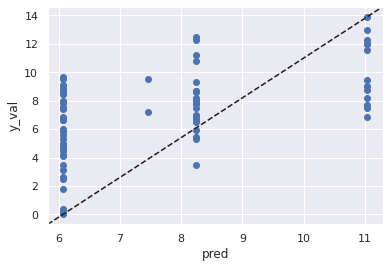

In [24]:
plt.scatter(pred, y_val, label= 'Sales')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_val')

In [25]:
# from sklearn.tree import export_graphviz
# import pydotplus

In [26]:
# DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
#            max_leaf_nodes=None, min_impurity_decrease=0.0,
#            min_impurity_split=None, min_samples_leaf=5,
#            min_samples_split=2, min_weight_fraction_leaf=0.0,
#            random_state=0, splitter='best')

In [27]:
# dot_data = export_graphviz(regressor,
#                            out_file=None,
#                            filled=True,
#                            rounded=True,
#                            special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data)
# nodes = graph.get_node_list()

# graph.write_png('python_full_decision_tree.png')

**(c)**

In [25]:
path = regressor.cost_complexity_pruning_path(X_train,y_train)
path

{'ccp_alphas': array([0.        , 0.47027619, 0.83163255, 2.0506677 ]),
 'impurities': array([4.49221125, 4.96248744, 5.79411998, 7.84478769])}

In [26]:
alphas = path['ccp_alphas']

5.851132750038924
5.799140142329174
5.799140142329172
8.424991907226559
Best alpha with lowest test MSE: 0.831632546258934


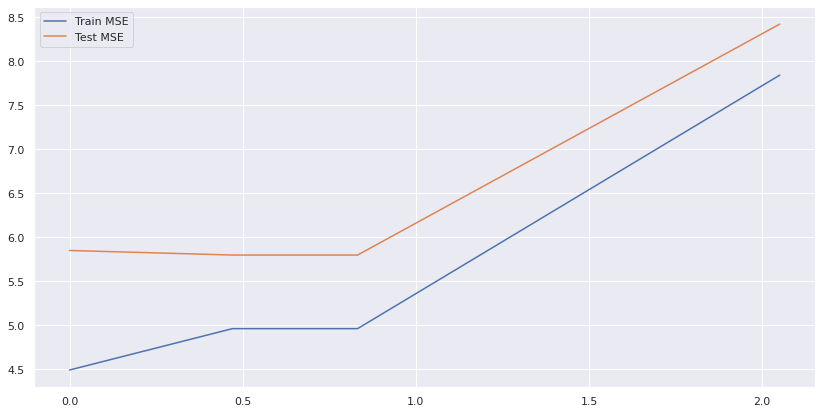

In [27]:
# https://www.analyticsvidhya.com/blog/2020/10/cost-complexity-pruning-decision-trees/

mse_train, mse_test=[],[]
low_test_MSE = mean_squared_error(y_val,pred)
best_alpha = 0.00000

for i in alphas:
    tree=DecisionTreeRegressor(max_depth=2, ccp_alpha=i)
    
    tree.fit(X_train,y_train)
    y_train_pred=tree.predict(X_train)
    y_test_pred=tree.predict(X_val)
    
    mse_train.append(mean_squared_error(y_train,y_train_pred))
    mse_test.append(mean_squared_error(y_val,y_test_pred))
    print(mean_squared_error(y_val,y_test_pred))
    
    #To find the best alpha with lowest test MSE
    if mean_squared_error(y_val,y_test_pred) < low_test_MSE:
        low_test_MSE = mean_squared_error(y_val,y_test_pred)
        best_alpha = i

print("Best alpha with lowest test MSE:", best_alpha)        
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=mse_train,x=alphas,label="Train MSE")
sns.lineplot(y=mse_test,x=alphas,label="Test MSE")
plt.show()

In [28]:
regressor.set_params(ccp_alpha=0.8316)
regressor.fit(X_train, y_train)
pruned_MSE = mean_squared_error(y_val, regressor.predict(X_val))
print('Pruned MSE:', pruned_MSE)

Pruned MSE: 5.799140142329174


This shows that pruning reduces the test MSE.

**(d)**

In [29]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import BaggingRegressor

In [30]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=5)
# define the model
regr = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10, random_state=0).fit(X_train, y_train)

In [49]:
ypredbag = regr.predict(X_val)
print("Bagging Test MSE:", mean_squared_error(y_val, ypredbag))

Bagging Test MSE: 3.1653017750000005


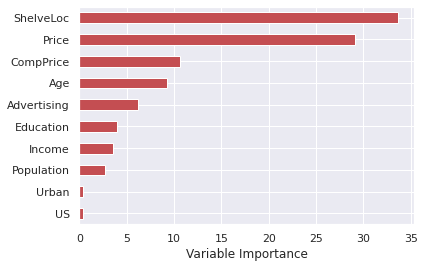

In [50]:
regr2 = DecisionTreeRegressor().fit(X_train, y_train)

Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=carseats.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

The most important features are the ShelveLoc, Price. 

**(e)**

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rf_regr = RandomForestRegressor(max_features=6, random_state=1)
rf_regr.fit(X_train, y_train)

RandomForestRegressor(max_features=6, random_state=1)

In [53]:
pred = rf_regr.predict(X_val)
print("Random Forest Test MSE:", mean_squared_error(y_val, pred))

Random Forest Test MSE: 3.1309143856249992


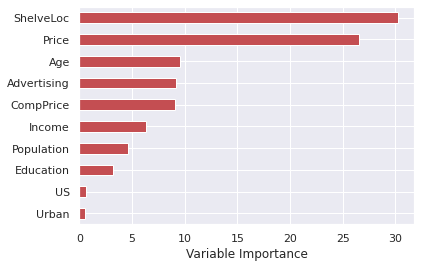

In [54]:
ImportanceRF = pd.DataFrame({'Importance':rf_regr.feature_importances_*100}, index=carseats.columns)
ImportanceRF.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

The most important features are the ShelveLoc, Price. 

***Trying with different m(m = sqrt(p)):-***

In [55]:
rf_regr2 = RandomForestRegressor(max_features=3, random_state=1)
rf_regr2.fit(X_train, y_train)

RandomForestRegressor(max_features=3, random_state=1)

In [56]:
pred2 = rf_regr2.predict(X_val)
print("Random Forest Test MSE:", mean_squared_error(y_val, pred2))

Random Forest Test MSE: 3.4083675397500017


Here the common rule of m = sqrt(p) has a higher MSE than m = 6.

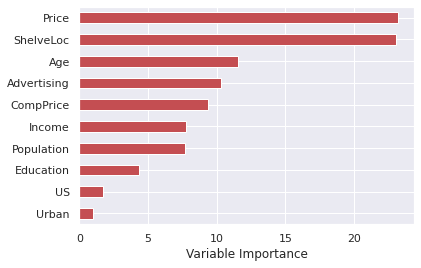

In [57]:
ImportanceRF2 = pd.DataFrame({'Importance':rf_regr2.feature_importances_*100}, index=carseats.columns)
ImportanceRF2.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

Price and ShelveLoc are equally important in this context

In [58]:
rf_regr3 = RandomForestRegressor(max_features=4, random_state=1)
rf_regr3.fit(X_train, y_train)

RandomForestRegressor(max_features=4, random_state=1)

In [59]:
pred3 = rf_regr3.predict(X_val)
print("Random Forest Test MSE:", mean_squared_error(y_val, pred3))

Random Forest Test MSE: 3.3385224983750006


The MSE is still higher than that of m = 6.

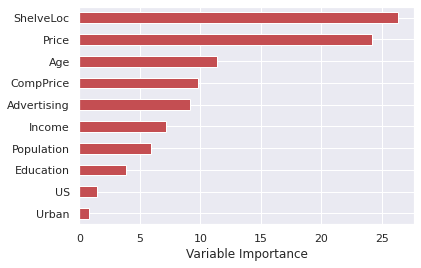

In [60]:
ImportanceRF3 = pd.DataFrame({'Importance':rf_regr3.feature_importances_*100}, index=carseats.columns)
ImportanceRF3.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

The variable importance plot shows that ShelveLoc and Price are the important features.